In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# membaca dataset 
data = pd.read_csv("~/Downloads/cancer_data.csv")

#mengahapus kolom yang tidak digunakan
data.drop(["Unnamed: 32","id"], axis=1, inplace=True)

# merubah label M (ganas) = 1 dan B (jinak) = 0
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]

# menampilkan sample data
data.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [3]:
x = data.drop(['diagnosis'], axis=1)
y = data['diagnosis']

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, shuffle=False)

In [6]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [7]:
y_pred = model.predict(x_test)

In [8]:
confusion_matrix(y_test, y_pred)

array([[39,  4],
       [ 2, 12]])

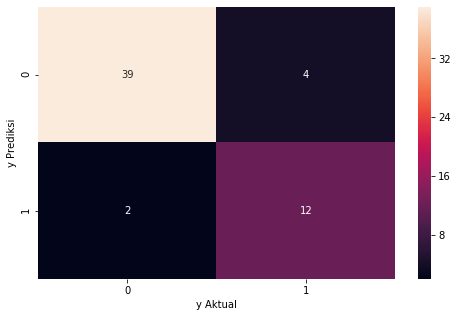

In [12]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y Aktual")
plt.ylabel("y Prediksi")
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        43
           1       0.75      0.86      0.80        14

    accuracy                           0.89        57
   macro avg       0.85      0.88      0.86        57
weighted avg       0.90      0.89      0.90        57



[Text(1155.8571428571427, 2053.6, 'X[22] <= 105.95\ngini = 0.474\nsamples = 512\nvalue = [314, 198]'),
 Text(717.4285714285713, 1812.0, 'X[27] <= 0.159\ngini = 0.1\nsamples = 304\nvalue = [288, 16]'),
 Text(558.0, 1570.4, 'X[28] <= 0.161\ngini = 0.047\nsamples = 293\nvalue = [286, 7]'),
 Text(478.2857142857142, 1328.8, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(637.7142857142857, 1328.8, 'X[24] <= 0.178\ngini = 0.04\nsamples = 292\nvalue = [286, 6]'),
 Text(398.57142857142856, 1087.2, 'X[21] <= 30.145\ngini = 0.027\nsamples = 288\nvalue = [284, 4]'),
 Text(159.42857142857142, 845.5999999999999, 'X[13] <= 48.975\ngini = 0.008\nsamples = 258\nvalue = [257, 1]'),
 Text(79.71428571428571, 604.0, 'gini = 0.0\nsamples = 254\nvalue = [254, 0]'),
 Text(239.1428571428571, 604.0, 'X[19] <= 0.004\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(159.42857142857142, 362.39999999999986, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(318.85714285714283, 362.39999999999986, 'gini = 0.0\ns

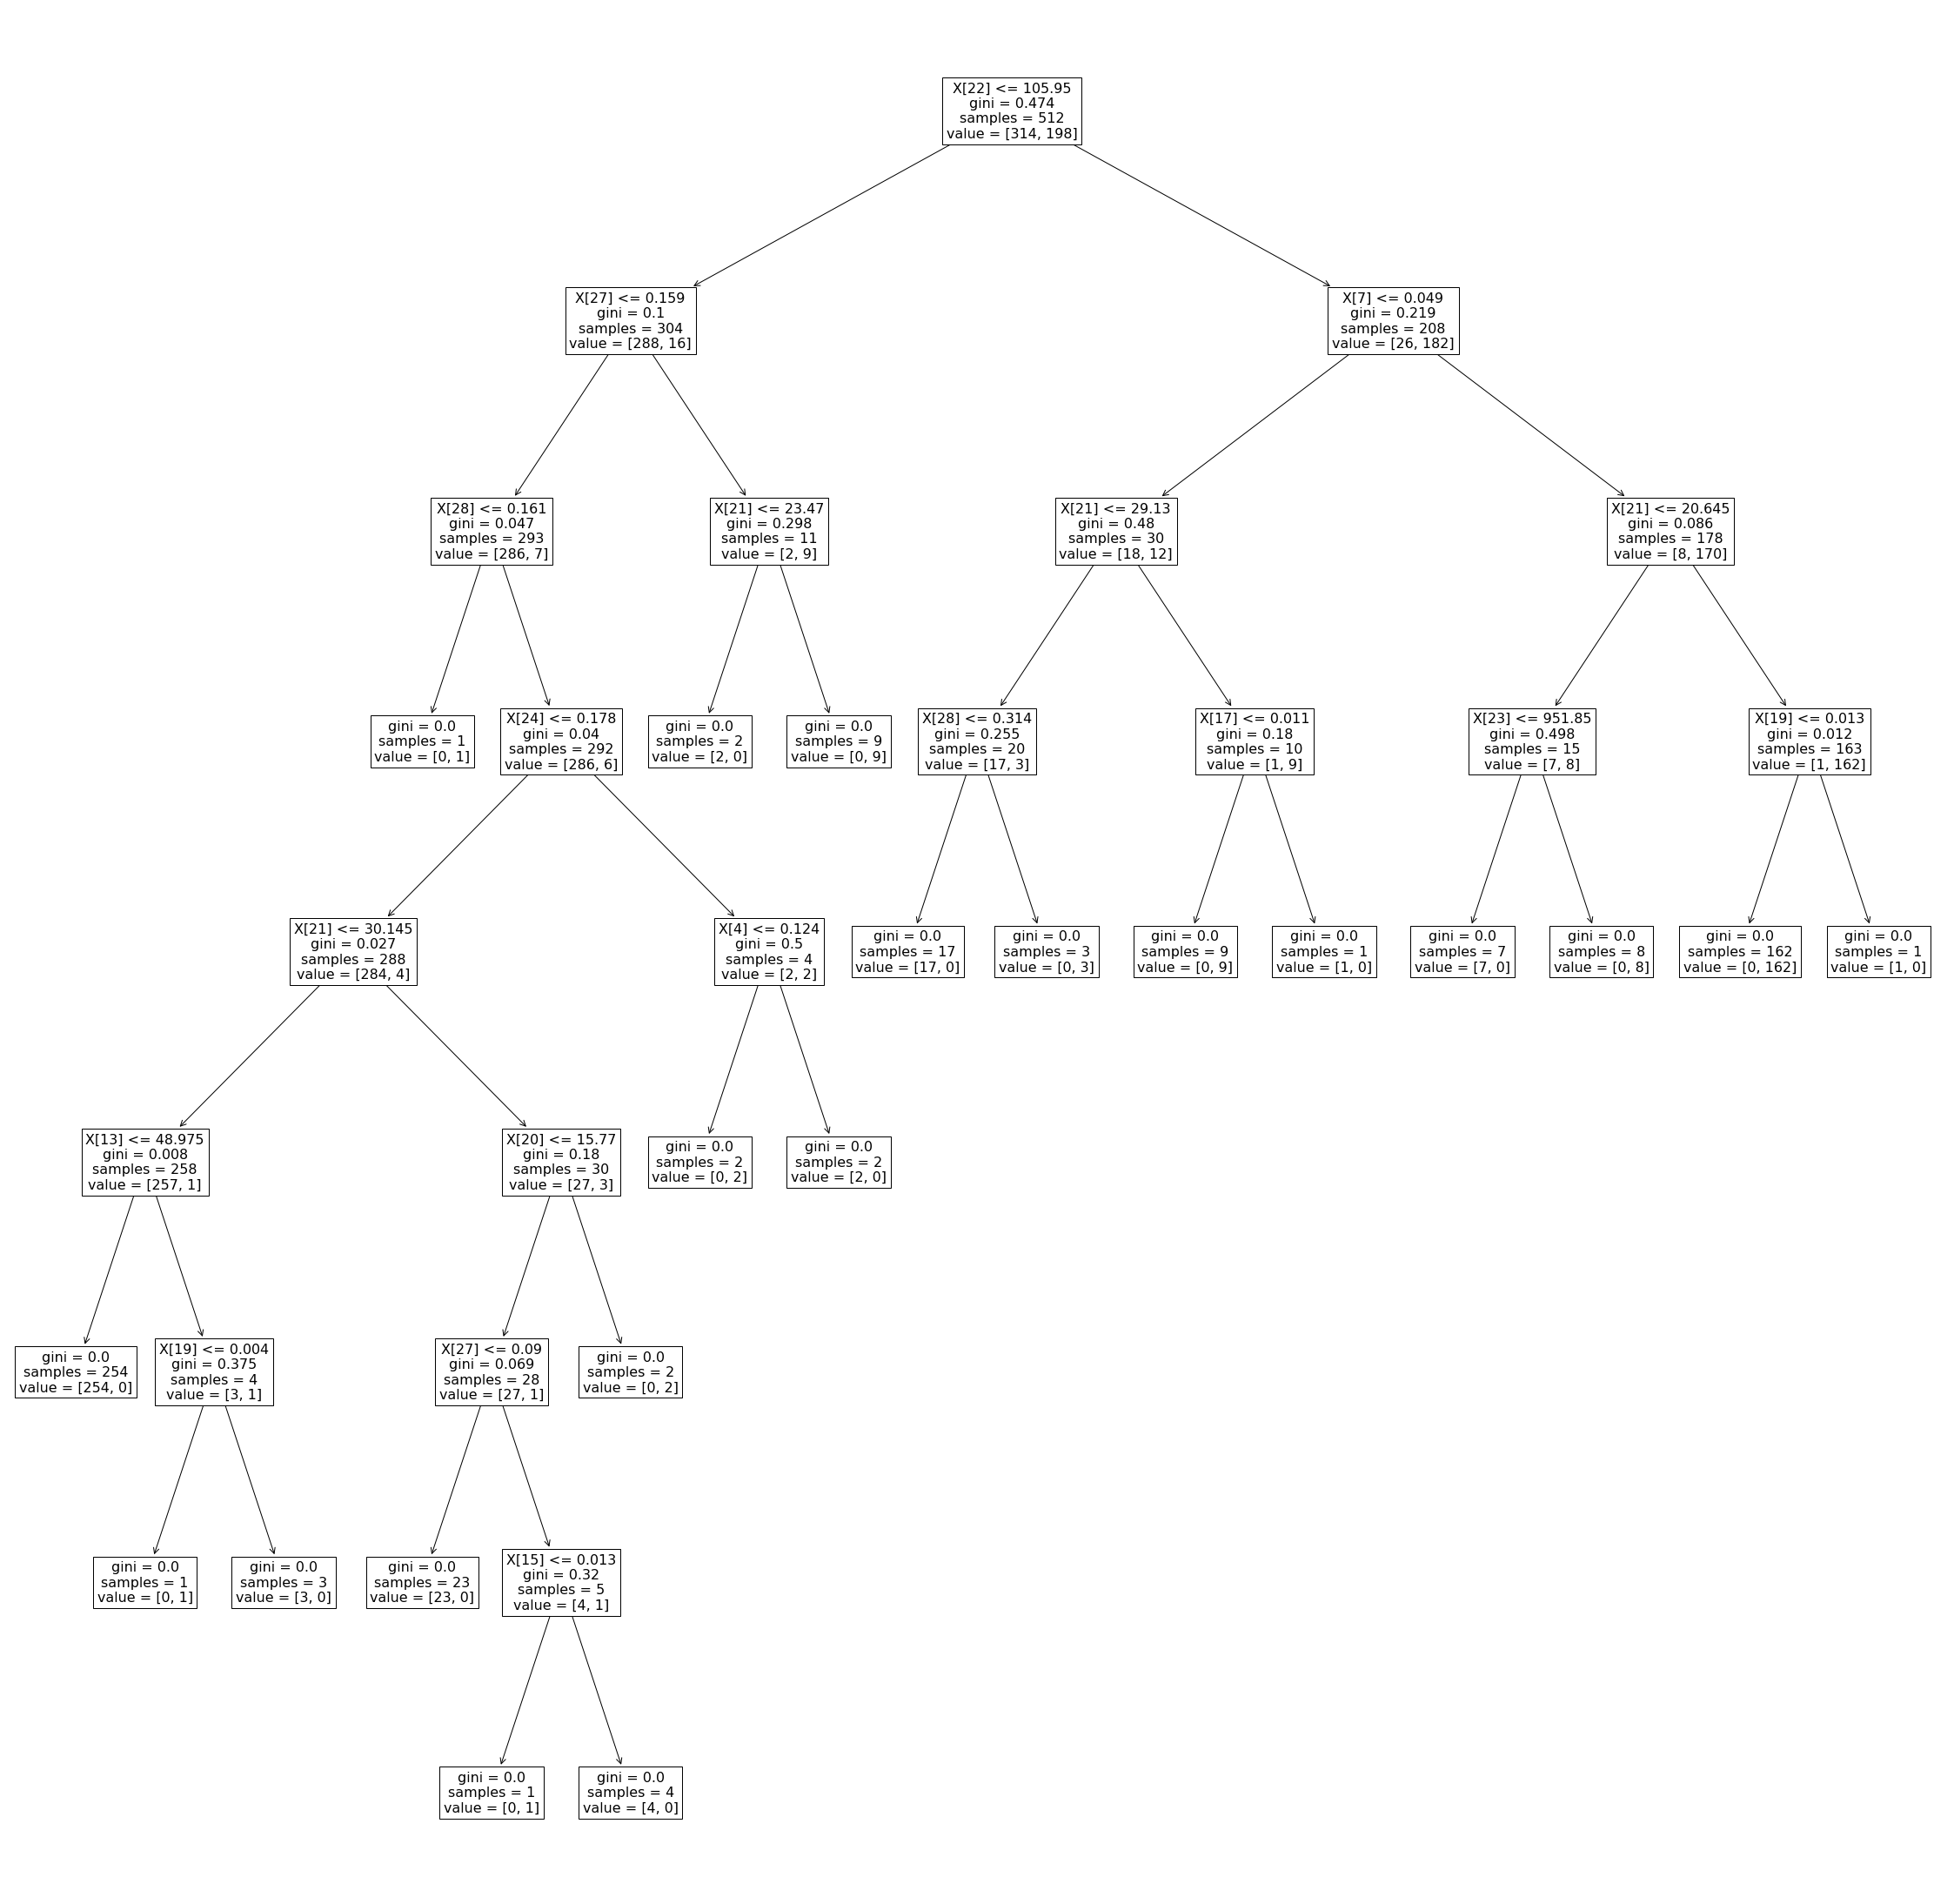

In [15]:
plt.figure(figsize=(40,40))
from sklearn import tree
tree.plot_tree(model.fit(x_train, y_train))

In [16]:
DT_columns = x_train.columns.tolist()
classname = ['Ganas', 'Jinak']

In [17]:
tree.export_graphviz(model.fit(x_train,y_train),
                     out_file='decision.dot',
                     feature_names=DT_columns,
                     class_names=classname)

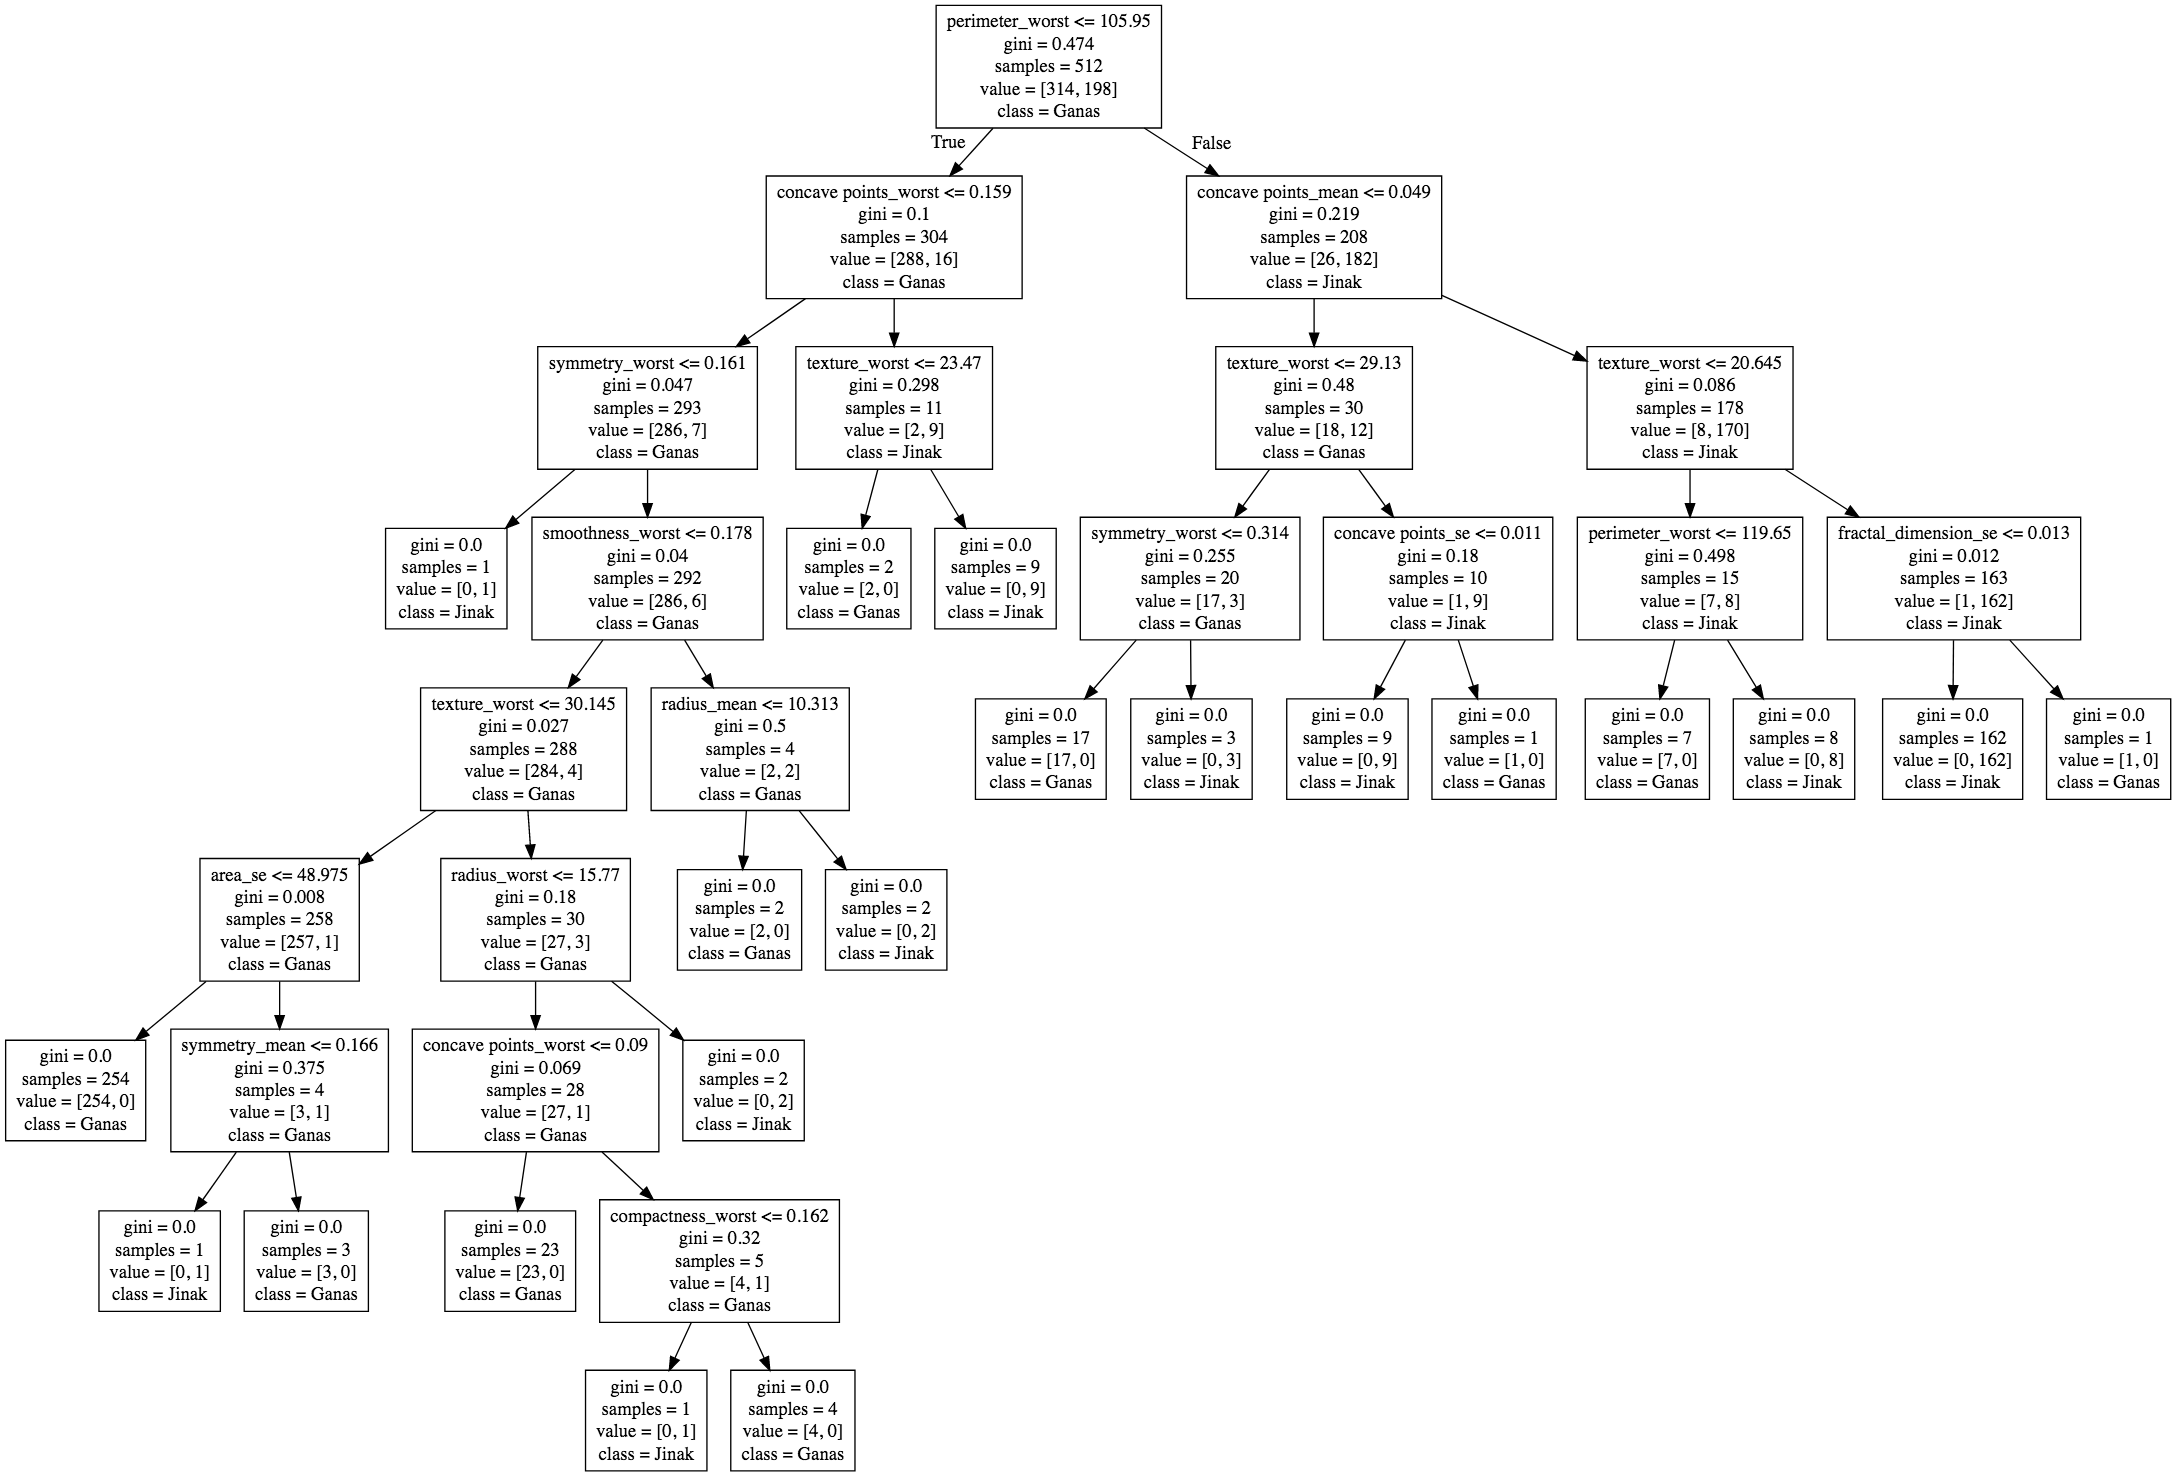

In [30]:
from PIL import Image
image = Image.open('/Users/muhammadramzy/Downloads/graphviz.png')
image

In [24]:
model.score(x_train,y_train)

1.0

In [25]:
model.score(x_test,y_test)

0.9473684210526315